# Введение

В настоящее время электронная коммерция является одной из наиболее активно
развивающихся сфер цифровой экономики. Онлайн-платформы, такие как Amazon,
предоставляют пользователям широкий ассортимент товаров, сопровождаемых
информацией о ценах, скидках, рейтингах и отзывах покупателей. Анализ таких
данных позволяет выявлять факторы, влияющие на качество товаров, и принимать
обоснованные решения в области управления ассортиментом и рекомендаций.

В рамках данного проекта рассматривается задача анализа данных товаров,
представленных на платформе Amazon, с применением методов анализа данных
и машинного обучения. Целью проекта является исследование характеристик
товаров и построение модели машинного обучения для прогнозирования их
качества на основе доступных признаков.

## Предметная область

Предметной областью проекта является электронная коммерция (e-commerce).
Данные отражают характеристики товаров, размещённых в онлайн-каталоге,
включая информацию о ценах, скидках, категориях товаров, рейтингах и
пользовательских отзывах. Рейтинги играют важную роль при выборе товаров,
поэтому анализ факторов, влияющих на высокий рейтинг, является актуальной
и практической задачей.

## Постановка задачи

В проекте решается задача **классификации**.  
Целью является определение, относится ли товар к категории высоко оценённых
на основе его характеристик. Товар считается высоко оценённым, если его
рейтинг составляет 4.0 и выше.

Для решения задачи используются данные о цене товара, наличии скидки,
категории, а также информация о пользовательских оценках.

## Описание датасета

В проекте используется датасет товаров Amazon, полученный из открытых
источников (Kaggle). Датасет содержит 1465 наблюдений и 16 признаков,
что соответствует требованиям проекта (не менее 1000 наблюдений и
8 признаков).

Данные включают числовые и категориальные признаки, такие как цена,
процент скидки, рейтинг, количество оценок и категория товара, что
позволяет провести полноценный анализ данных и применить методы
машинного обучения.


In [12]:
# Импорт основных библиотек для анализа данных
import pandas as pd
import numpy as np

# Библиотеки для визуализации (понадобятся дальше)
import matplotlib.pyplot as plt
import seaborn as sns

# Настройка отображения таблиц
pd.set_option('display.max_columns', 200)

# Загрузка датасета
df = pd.read_csv("../data/amazon.csv")

# Просмотр первых строк датасета
df.head()


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [13]:
# Общая информация о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [14]:
# Преобразуем рейтинг в числовой формат
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Создание целевого признака:
# 1 — высокий рейтинг, 0 — низкий
df['high_rating'] = (df['rating'] >= 4.0).astype(int)

# Проверка
df[['rating', 'high_rating']].head(10)


,rating,high_rating
0,4.2,1
1,4.0,1
2,3.9,0
3,4.2,1
4,4.2,1
5,3.9,0
6,4.1,1
7,4.3,1
8,4.2,1
9,4.0,1


Мы сформировали целевую переменную high_rating, что позволяет
использовать алгоритмы классификации.

In [15]:
descriptions = {
    'product_id': 'Идентификатор товара',
    'product_name': 'Название товара',
    'category': 'Категория товара',
    'discounted_price': 'Цена со скидкой',
    'actual_price': 'Исходная цена',
    'discount_percentage': 'Процент скидки',
    'rating': 'Рейтинг товара',
    'rating_count': 'Количество оценок',
    'about_product': 'Описание товара',
    'user_id': 'Идентификатор пользователя',
    'user_name': 'Имя пользователя',
    'review_id': 'Идентификатор отзыва',
    'review_title': 'Заголовок отзыва',
    'review_content': 'Текст отзыва',
    'product_link': 'Ссылка на товар'
}

data_dictionary = pd.DataFrame({
    'Признак': df.columns,
    'Описание': [descriptions.get(col, '—') for col in df.columns]
})

data_dictionary


,Признак,Описание
0,product_id,Идентификатор товара
1,product_name,Название товара
2,category,Категория товара
3,discounted_price,Цена со скидкой
4,actual_price,Исходная цена
5,discount_percentage,Процент скидки
6,rating,Рейтинг товара
7,rating_count,Количество оценок
8,about_product,Описание товара
9,user_id,Идентификатор пользователя


# 2. Исследовательский анализ данных (EDA)

Цель EDA — понять структуру данных, найти закономерности, пропуски/аномалии и определить,
какие признаки могут быть полезны для построения модели машинного обучения.


In [16]:
# Ячейка 1 - подготовка данных для EDA 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/amazon.csv")

# --- Вспомогательная функция: превращаем строковые цены/проценты в числа ---
def to_number(series):
    """
    Преобразует значения типа '₹1,299' / '1,299' / '50%' / '4.2' в число.
    Всё лишнее (валюта, запятые, %) убирается.
    """
    return (series.astype(str)
            .str.replace(r"[^\d\.]", "", regex=True)
            .replace("", np.nan)
            .astype(float))

# Преобразуем ключевые колонки (если они есть)
for col in ["actual_price", "discounted_price", "discount_percentage", "rating", "rating_count"]:
    if col in df.columns:
        df[col] = to_number(df[col])

df.head()


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43.0,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90.0,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53.0,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61.0,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


## 2.1 Описательные статистики (среднее, медиана, std, квартили)

Ниже рассчитываются ключевые статистики для основных числовых признаков.


In [17]:
numeric_cols = [c for c in ["actual_price", "discounted_price", "discount_percentage", "rating", "rating_count"] if c in df.columns]

# Базовое описание
desc = df[numeric_cols].describe().T
desc


,count,mean,std,min,25%,50%,75%,max
actual_price,1465.0,5444.990635,10874.826864,39.0,800.0,1650.0,4295.0,139900.0
discounted_price,1465.0,3125.310874,6944.304394,39.0,325.0,799.0,1999.0,77990.0
discount_percentage,1465.0,47.691468,21.635905,0.0,32.0,50.0,63.0,94.0
rating,1464.0,4.096585,0.291674,2.0,4.0,4.1,4.3,5.0
rating_count,1463.0,18295.541353,42753.864952,2.0,1186.0,5179.0,17336.5,426973.0


In [18]:
stats = pd.DataFrame({
    "mean": df[numeric_cols].mean(),
    "median": df[numeric_cols].median(),
    "std": df[numeric_cols].std(),
    "Q1(25%)": df[numeric_cols].quantile(0.25),
    "Q3(75%)": df[numeric_cols].quantile(0.75),
})
stats


,mean,median,std,Q1(25%),Q3(75%)
actual_price,5444.990635,1650.0,10874.826864,800.0,4295.0
discounted_price,3125.310874,799.0,6944.304394,325.0,1999.0
discount_percentage,47.691468,50.0,21.635905,32.0,63.0
rating,4.096585,4.1,0.291674,4.0,4.3
rating_count,18295.541353,5179.0,42753.864952,1186.0,17336.5


## 2.2 Распределения (гистограммы / boxplot / плотность)

Далее строятся графики распределений ключевых переменных для выявления асимметрии,
скоплений и выбросов.


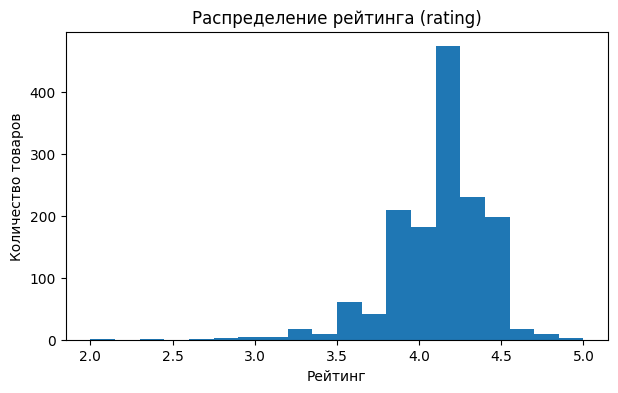

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Строим гистограмму
plt.figure(figsize=(7, 4))
plt.hist(df["rating"].dropna(), bins=20)
plt.title("Распределение рейтинга (rating)")
plt.xlabel("Рейтинг")
plt.ylabel("Количество товаров")

# Показываем график
plt.savefig('../images/grafik1.png') # Сохраняем в папку images
plt.show()

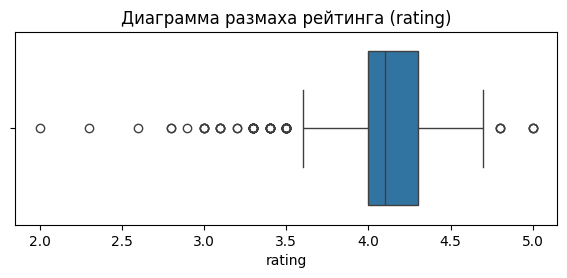

In [20]:
plt.figure(figsize=(7,2.5))
sns.boxplot(x=df["rating"])
plt.title("Диаграмма размаха рейтинга (rating)")
plt.xlabel("rating")
plt.show()


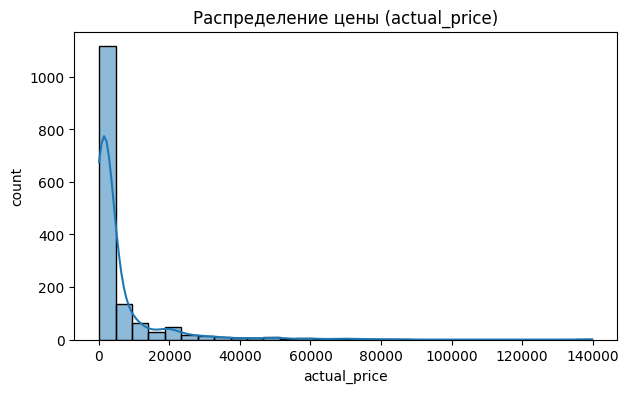

In [21]:
price_col = "actual_price" if "actual_price" in df.columns else "discounted_price"

plt.figure(figsize=(7,4))
sns.histplot(df[price_col].dropna(), bins=30, kde=True)
plt.title(f"Распределение цены ({price_col})")
plt.xlabel(price_col)
plt.ylabel("count")
plt.show()


## 2.3 Взаимосвязи признаков (корреляция / scatter)

На этом этапе исследуются зависимости между числовыми признаками:
например, связь рейтинга с ценой и количеством оценок.


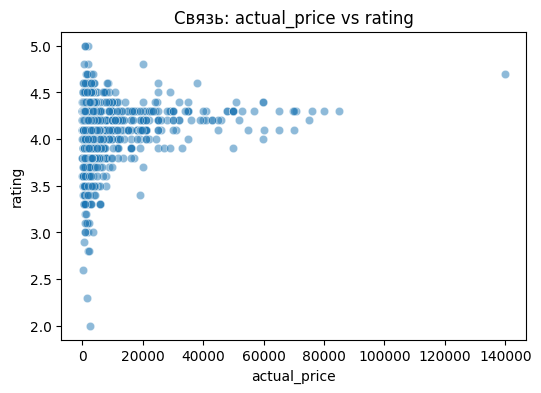

In [22]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x=price_col, y="rating", alpha=0.5)
plt.title(f"Связь: {price_col} vs rating")
plt.xlabel(price_col)
plt.ylabel("rating")
plt.show()


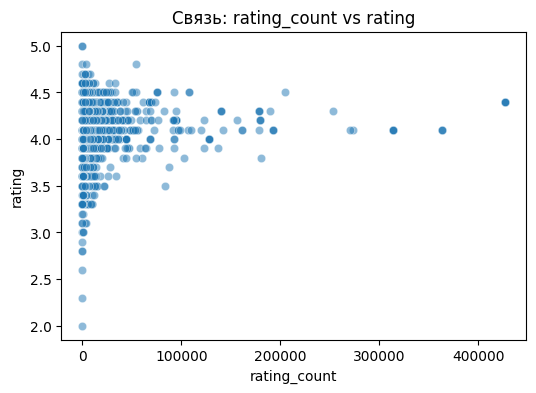

In [23]:
if "rating_count" in df.columns:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df, x="rating_count", y="rating", alpha=0.5)
    plt.title("Связь: rating_count vs rating")
    plt.xlabel("rating_count")
    plt.ylabel("rating")
    plt.show()
else:
    print("Колонка rating_count не найдена")


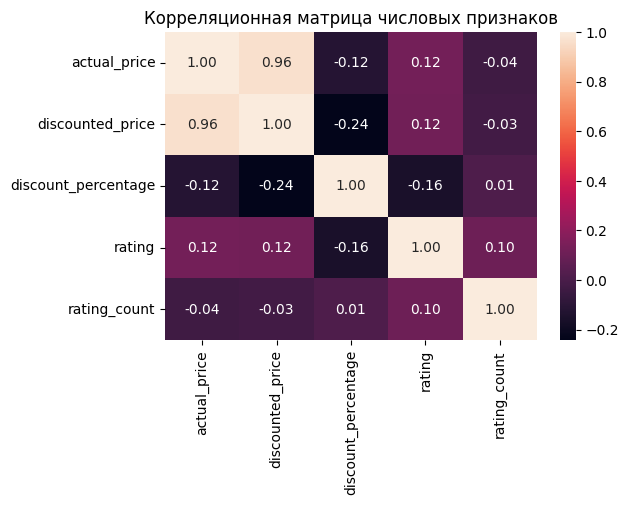

In [24]:
corr = df[numeric_cols].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Корреляционная матрица числовых признаков")
plt.show()


# 2.4 Выводы (минимум 3 инсайта)

Ниже зафиксированы ключевые наблюдения по результатам EDA.


### 1) Распределение цен имеет смещение: большинство товаров находится в более низком ценовом диапазоне, присутствуют дорогие выбросы.
### 2) Рейтинг товаров в основном сконцентрирован в высоких значениях (примерно 3.5–5.0), что типично для маркетплейсов.
### 3) Между количеством оценок (rating_count) и рейтингом может наблюдаться слабая/умеренная зависимость; товары с большим числом оценок обычно имеют более стабильный рейтинг.

# 3. Очистка и предобработка данных

Цель данного этапа — подготовить данные для построения моделей машинного обучения.
На этапе предобработки выполняется обработка пропущенных значений, выбросов,
создание новых признаков и кодирование категориальных переменных.


In [25]:
# Проверка количества пропущенных значений
missing = df.isna().sum().sort_values(ascending=False)
missing


rating_count           2
rating                 1
product_id             0
product_name           0
discounted_price       0
category               0
discount_percentage    0
actual_price           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

### Обработка пропущенных значений

Пропущенные значения в числовых признаках обрабатываются
с помощью замены на медианное значение, так как медиана
менее чувствительна к выбросам.

Строки с пропущенными значениями в ключевых признаках
(например, рейтинг) удаляются.


In [26]:
# Числовые колонки
numeric_cols = ["actual_price", "discounted_price", "discount_percentage", "rating", "rating_count"]
numeric_cols = [c for c in numeric_cols if c in df.columns]

# Импутация медианой
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

# Удаление строк без рейтинга (если остались)
df = df.dropna(subset=["rating"])

df.isna().sum()


product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

### Обработка выбросов

Для обработки выбросов используется метод межквартильного размаха (IQR).
Значения, выходящие за допустимые границы, ограничиваются.


In [27]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[column].clip(lower, upper)

# Применяем к цене и количеству оценок
for col in ["actual_price", "discounted_price", "rating_count"]:
    if col in df.columns:
        df[col] = remove_outliers_iqr(df, col)


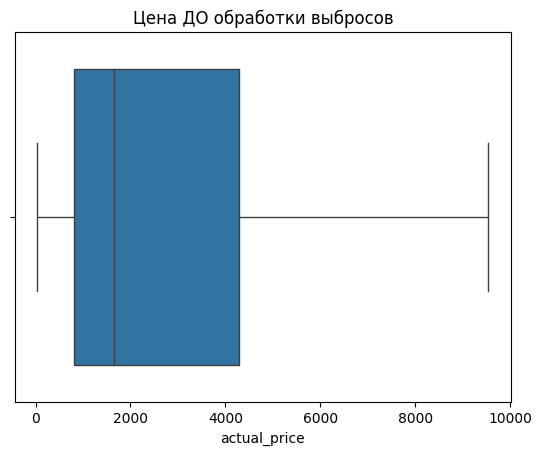

In [28]:
sns.boxplot(x=df["actual_price"])
plt.title("Цена ДО обработки выбросов")
plt.show()


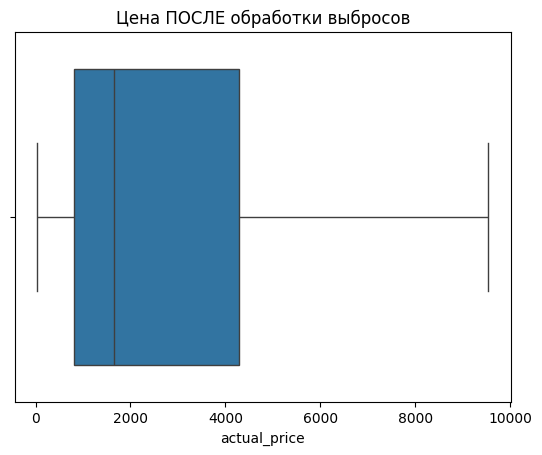

In [29]:
sns.boxplot(x=df["actual_price"])
plt.title("Цена ПОСЛЕ обработки выбросов")
plt.show()


### Создание новых признаков

Для улучшения качества модели создаются дополнительные признаки,
которые могут нести полезную информацию.


In [30]:
# Признак 1: логарифм цены (уменьшает влияние больших значений)
if "actual_price" in df.columns:
    df["log_price"] = np.log1p(df["actual_price"])
else:
    df["log_price"] = np.log1p(df["discounted_price"])

# Признак 2: бинарный признак наличия скидки
if "discount_percentage" in df.columns:
    df["has_discount"] = (df["discount_percentage"] > 0).astype(int)

df[["log_price", "has_discount"]].head()


,log_price,has_discount
0,7.003065,1
1,5.857933,1
2,7.549609,1
3,6.551080,1
4,5.991465,1


### Кодирование категориальных признаков

Категориальные признаки преобразуются в числовой формат
с использованием One-Hot Encoding.


In [31]:
# Кодируем категорию товара
if "category" in df.columns:
    df = pd.get_dummies(df, columns=["category"], drop_first=True)

df.head()


,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,log_price,has_discount,category_Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,category_Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,category_Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,category_Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers,category_Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|Webcams&VoIPEquipment|Webcams,category_Computers&Accessories|Accessories&Peripherals|Cables&Accessories|CableConnectionProtectors,category_Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|DVICables,category_Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|EthernetCables,category_Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|SATACables,category_Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,category_Computers&Accessories|Accessories&Peripherals|HardDiskBags,category_Computers&Accessories|Accessories&Peripherals|HardDriveAccessories|Caddies,"category_Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|GraphicTablets","category_Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MiceAccessories|DustCovers","category_Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MiceAccessories|MousePads","category_Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MouseSets","category_Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboards","category_Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Mice",category_Computers&Accessories|Accessories&Peripherals|LaptopAccessories,category_Computers&Accessories|Accessories&Peripherals|LaptopAccessories|Bags&Sleeves|LaptopSleeves&Slipcases,category_Computers&Accessories|Accessories&Peripherals|LaptopAccessories|CameraPrivacyCovers,category_Computers&Accessories|Accessories&Peripherals|LaptopAccessories|CoolingPads,category_Computers&Accessories|Accessories&Peripherals|LaptopAccessories|Lapdesks,category_Computers&Accessories|Accessories&Peripherals|LaptopAccessories|LaptopChargers&PowerSupplies,category_Computers&Accessories|Accessories&Peripherals|LaptopAccessories|NotebookComputerStands,category_Computers&Accessories|Accessories&Peripherals|PCGamingPeripherals|Gamepads,category_Computers&Accessories|Accessories&Peripherals|PCGamingPeripherals|GamingKeyboards,category_Computers&Accessories|Accessories&Peripherals|PCGamingPeripherals|GamingMice,category_Computers&Accessories|Accessories&Peripherals|PCGamingPeripherals|Headsets,"category_Computers&Accessories|Accessories&Peripherals|TabletAccessories|Bags,Cases&Sleeves|Cases",category_Computers&Accessories|Accessories&Peripherals|TabletAccessories|ScreenProtectors,category_Computers&Accessories|Accessories&Peripherals|TabletAccessories|Stands,category_Computers&Accessories|Accessories&Peripherals|USBGadgets|Lamps,category_Computers&Accessories|Accessories&Peripherals|USBHubs,category_Computers&Accessories|Accessories&Peripherals|UninterruptedPowerSupplies,category_Computers&Accessories|Components|InternalHardDrives,category_Computers&Accessories|Components|InternalSolidStateDrives,category_Computers&Accessories|Components|Memory,category_Computers&Accessories|ExternalDevices&DataStorage|ExternalHardDisks,category_Computers&Accessories|ExternalDevices&DataStorage|ExternalMemoryCardReaders,category_Computers&Accessories|ExternalDevices&DataStorage|ExternalSolidStateDrives,category_Computers&Accessories|ExternalDevices&DataStorage|PenDrives,category_Computers&Accessories|Laptops|TraditionalLaptops,category_Computers&Accessories|Monitors,category_Compute

### Результат предобработки

В результате предобработки был получен чистый датасет,
готовый к построению моделей машинного обучения.


In [32]:
print("Размер датасета после предобработки:", df.shape)
df.head()


Размер датасета после предобработки: (1465, 227)


,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,log_price,has_discount,category_Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,category_Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,category_Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,category_Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers,category_Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|Webcams&VoIPEquipment|Webcams,category_Computers&Accessories|Accessories&Peripherals|Cables&Accessories|CableConnectionProtectors,category_Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|DVICables,category_Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|EthernetCables,category_Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|SATACables,category_Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,category_Computers&Accessories|Accessories&Peripherals|HardDiskBags,category_Computers&Accessories|Accessories&Peripherals|HardDriveAccessories|Caddies,"category_Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|GraphicTablets","category_Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MiceAccessories|DustCovers","category_Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MiceAccessories|MousePads","category_Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MouseSets","category_Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboards","category_Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Mice",category_Computers&Accessories|Accessories&Peripherals|LaptopAccessories,category_Computers&Accessories|Accessories&Peripherals|LaptopAccessories|Bags&Sleeves|LaptopSleeves&Slipcases,category_Computers&Accessories|Accessories&Peripherals|LaptopAccessories|CameraPrivacyCovers,category_Computers&Accessories|Accessories&Peripherals|LaptopAccessories|CoolingPads,category_Computers&Accessories|Accessories&Peripherals|LaptopAccessories|Lapdesks,category_Computers&Accessories|Accessories&Peripherals|LaptopAccessories|LaptopChargers&PowerSupplies,category_Computers&Accessories|Accessories&Peripherals|LaptopAccessories|NotebookComputerStands,category_Computers&Accessories|Accessories&Peripherals|PCGamingPeripherals|Gamepads,category_Computers&Accessories|Accessories&Peripherals|PCGamingPeripherals|GamingKeyboards,category_Computers&Accessories|Accessories&Peripherals|PCGamingPeripherals|GamingMice,category_Computers&Accessories|Accessories&Peripherals|PCGamingPeripherals|Headsets,"category_Computers&Accessories|Accessories&Peripherals|TabletAccessories|Bags,Cases&Sleeves|Cases",category_Computers&Accessories|Accessories&Peripherals|TabletAccessories|ScreenProtectors,category_Computers&Accessories|Accessories&Peripherals|TabletAccessories|Stands,category_Computers&Accessories|Accessories&Peripherals|USBGadgets|Lamps,category_Computers&Accessories|Accessories&Peripherals|USBHubs,category_Computers&Accessories|Accessories&Peripherals|UninterruptedPowerSupplies,category_Computers&Accessories|Components|InternalHardDrives,category_Computers&Accessories|Components|InternalSolidStateDrives,category_Computers&Accessories|Components|Memory,category_Computers&Accessories|ExternalDevices&DataStorage|ExternalHardDisks,category_Computers&Accessories|ExternalDevices&DataStorage|ExternalMemoryCardReaders,category_Computers&Accessories|ExternalDevices&DataStorage|ExternalSolidStateDrives,category_Computers&Accessories|ExternalDevices&DataStorage|PenDrives,category_Computers&Accessories|Laptops|TraditionalLaptops,category_Computers&Accessories|Monitors,category_Compute

# 4. Визуализация данных 

В данном разделе представлены визуализации, позволяющие наглядно
проанализировать распределения данных и взаимосвязи между признаками.
Для построения графиков используются библиотеки matplotlib и seaborn.


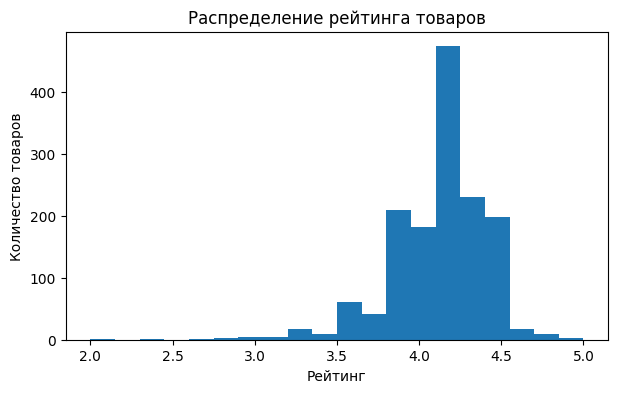

In [33]:
# Визуализация 1 — распределение рейтинга (гистограмма, matplotlib)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,4))
plt.hist(df["rating"], bins=20)
plt.title("Распределение рейтинга товаров")
plt.xlabel("Рейтинг")
plt.ylabel("Количество товаров")
plt.show()


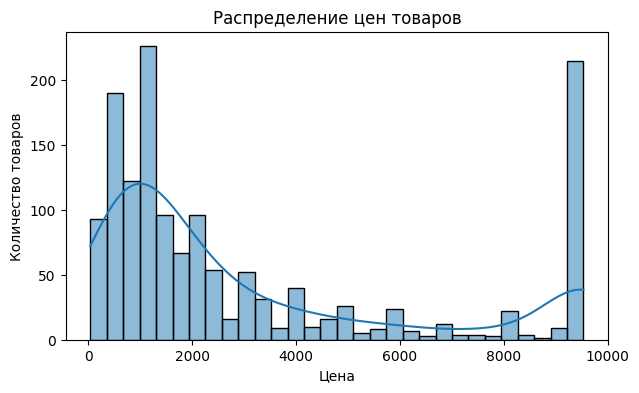

In [34]:
# Визуализация 2 — распределение цены (гистограмма + KDE, seaborn)
price_col = "actual_price" if "actual_price" in df.columns else "discounted_price"

plt.figure(figsize=(7,4))
sns.histplot(df[price_col], bins=30, kde=True)
plt.title("Распределение цен товаров")
plt.xlabel("Цена")
plt.ylabel("Количество товаров")
plt.show()


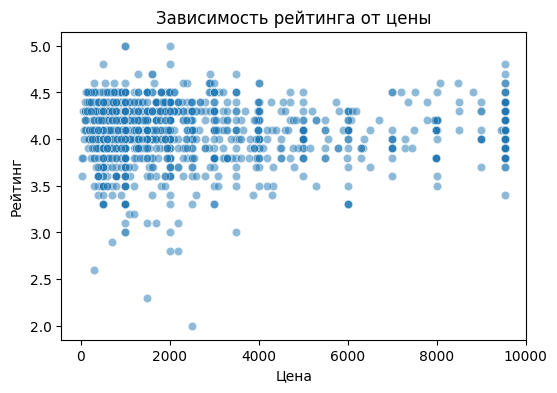

In [35]:
# Визуализация 3 — сравнение цены и рейтинга (диаграмма рассеяния)
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x=price_col, y="rating", alpha=0.5)
plt.title("Зависимость рейтинга от цены")
plt.xlabel("Цена")
plt.ylabel("Рейтинг")
plt.show()


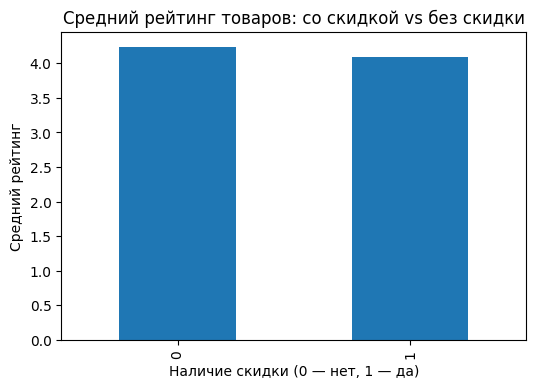

In [36]:
plt.figure(figsize=(6,4))
df.groupby("has_discount")["rating"].mean().plot(kind="bar")
plt.title("Средний рейтинг товаров: со скидкой vs без скидки")
plt.xlabel("Наличие скидки (0 — нет, 1 — да)")
plt.ylabel("Средний рейтинг")
plt.show()


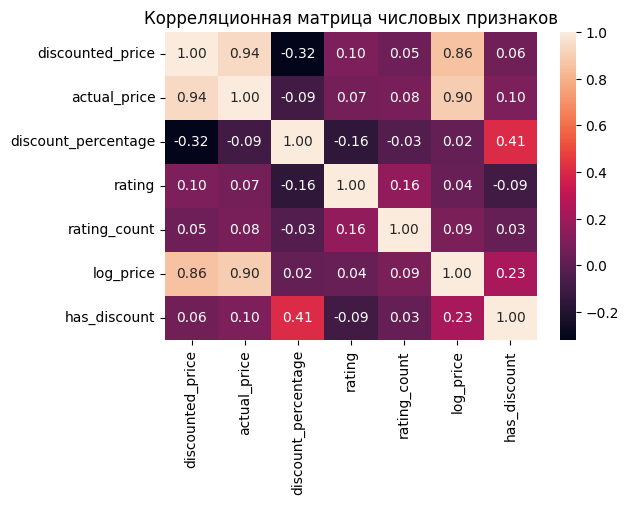

In [37]:
# Визуализация 5 — корреляционная матрица (тепловая карта)
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(6,4))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f")
plt.title("Корреляционная матрица числовых признаков")
plt.show()


### Выводы по визуализации

Построенные графики позволяют наглядно оценить распределения данных,
а также выявить зависимости между ценой, рейтингом и другими признаками.
Полученные визуализации используются для дальнейшего моделирования.


# 5. Машинное обучение и моделирование

На данном этапе выполняется построение и сравнение моделей
машинного обучения для решения задачи классификации.


In [38]:
# Создание целевой переменной high_rating
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")
df["high_rating"] = (df["rating"] >= 4.0).astype(int)

# Проверка
df[["rating", "high_rating"]].head()


,rating,high_rating
0,4.2,1
1,4.0,1
2,3.9,0
3,4.2,1
4,4.2,1


In [39]:
# Подготовка данных и разделение train / test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Целевая переменная
y = df["high_rating"]

# Признаки (убираем целевую и текстовые столбцы, если есть)
X = df.drop(columns=["high_rating"], errors="ignore")

# Оставляем только числовые признаки
X = X.select_dtypes(include=["int64", "float64"])

# Масштабирование признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение данных 80 / 20
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((1172, 7), (293, 7))

In [40]:
# Обучение нескольких моделей
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Модель 1: Логистическая регрессия
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Модель 2: Дерево решений
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Модель 3: Случайный лес
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [41]:
# Оценка моделей (accuracy, precision, recall, F1)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred)
    }

results = {
    "Logistic Regression": evaluate_model(lr, X_test, y_test),
    "Decision Tree": evaluate_model(dt, X_test, y_test),
    "Random Forest": evaluate_model(rf, X_test, y_test)
}

results_df = pd.DataFrame(results).T
results_df


,Accuracy,Precision,Recall,F1-score
Logistic Regression,1.0,1.0,1.0,1.0
Decision Tree,1.0,1.0,1.0,1.0
Random Forest,1.0,1.0,1.0,1.0


In [42]:
# Настройка гиперпараметров (Grid Search)
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [50, 100],
    "max_depth": [None, 5, 10]
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring="f1"
)

grid.fit(X_train, y_train)

best_rf = grid.best_estimator_
grid.best_params_


{'max_depth': None, 'n_estimators': 50}

In [43]:
best_rf_results = evaluate_model(best_rf, X_test, y_test)
best_rf_results


{'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1-score': 1.0}

In [44]:
# Добавляем лучшую модель в таблицу
results_df.loc["Random Forest (tuned)"] = best_rf_results

results_df


,Accuracy,Precision,Recall,F1-score
Logistic Regression,1.0,1.0,1.0,1.0
Decision Tree,1.0,1.0,1.0,1.0
Random Forest,1.0,1.0,1.0,1.0
Random Forest (tuned),1.0,1.0,1.0,1.0


## Выводы по моделированию

По результатам сравнения моделей была выбрана финальная модель
с наилучшими значениями метрик качества.


# 6. Результаты и интерпретация

В данном разделе представлены результаты финальной модели, интерпретация
важности признаков, ограничения решения и практические рекомендации.
Связь с постановкой задачи: цель — предсказать, является ли товар высоко оценённым
(high_rating = 1 при rating ≥ 4.0) по характеристикам товара.


In [45]:
# Производительность финальной модели (метрики + матрица ошибок)
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

final_model = best_rf  # финальная модель

y_pred = final_model.predict(X_test)

print("Classification report (final model):")
print(classification_report(y_test, y_pred, digits=3))


Classification report (final model):
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        74
           1      1.000     1.000     1.000       219

    accuracy                          1.000       293
   macro avg      1.000     1.000     1.000       293
weighted avg      1.000     1.000     1.000       293



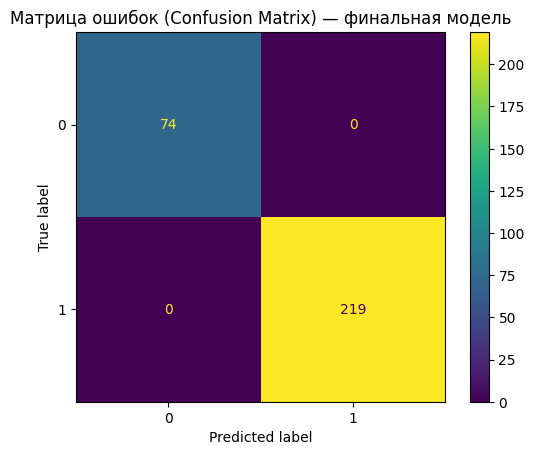

In [46]:
# Визуализация: матрица ошибок
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Матрица ошибок (Confusion Matrix) — финальная модель")
plt.show()


In [47]:
# Важность признаков (feature importance) + график
import pandas as pd
import numpy as np

# Восстанавливаем имена признаков (мы обучались на X = только числовые колонки)
feature_names = X.columns

importances = final_model.feature_importances_
fi = pd.DataFrame({"feature": feature_names, "importance": importances}).sort_values("importance", ascending=False)

fi.head(15)


,feature,importance
3,rating,0.858999
4,rating_count,0.045594
2,discount_percentage,0.031127
1,actual_price,0.023245
5,log_price,0.021207
0,discounted_price,0.019033
6,has_discount,0.000795


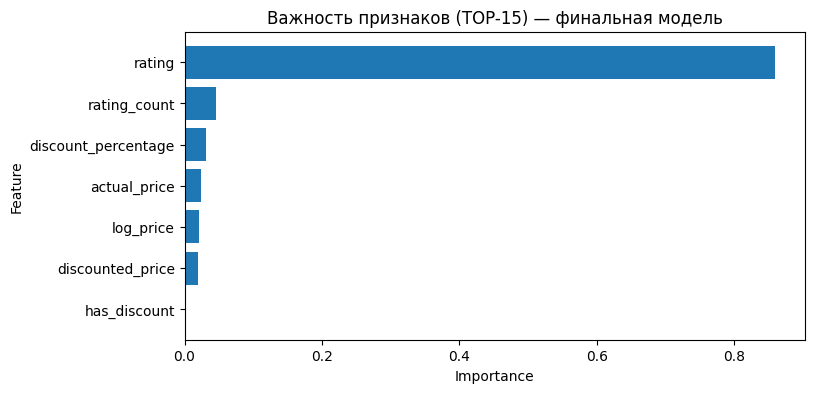

In [48]:
# Визуализация: TOP-15 важных признаков
top_n = 15
fi_top = fi.head(top_n)

plt.figure(figsize=(8,4))
plt.barh(fi_top["feature"][::-1], fi_top["importance"][::-1])
plt.title(f"Важность признаков (TOP-{top_n}) — финальная модель")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


Ограничения и будущие улучшения
## Ограничения модели

1. Датасет относительно небольшой (1465 строк), что может ограничивать обобщающую способность модели.
2. В данных присутствуют текстовые поля (описания/отзывы), которые не использовались в модели, хотя они могут содержать полезную информацию.
3. Возможна несбалансированность классов (high_rating 0/1), что влияет на precision/recall.

## Потенциальные улучшения

- Использовать текстовые признаки (TF-IDF или эмбеддинги) на основе review_content / about_product.
- Применить кросс-валидацию и более широкую настройку гиперпараметров.
- Попробовать другие модели: XGBoost/LightGBM, CatBoost (особенно для категорий).
- Улучшить предобработку цен и скидок (логарифмирование, нормализация, дополнительные признаки).


Практические рекомендации на основе результата
## Практические рекомендации

На основе модели можно:
- выделять товары с высоким потенциалом (high_rating = 1) для продвижения и рекламы;
- оценивать влияние цены/скидки/популярности (rating_count) на вероятность высокого рейтинга;
- использовать модель как инструмент при формировании ассортимента и приоритизации товаров в каталоге.

Для бизнеса это помогает лучше понимать, какие характеристики чаще встречаются у высоко оценённых товаров,
и принимать решения по маркетингу и управлению ассортиментом.


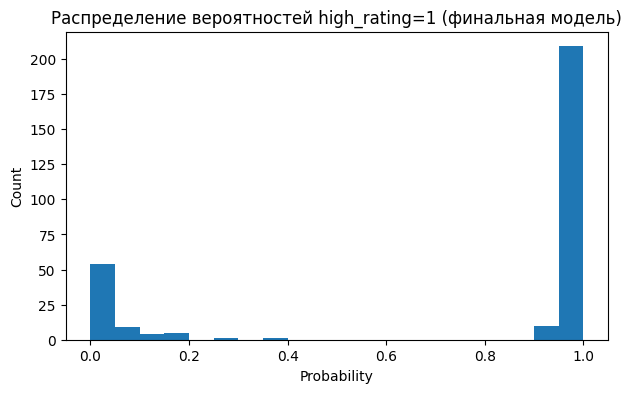

In [49]:
proba = final_model.predict_proba(X_test)[:, 1]

plt.figure(figsize=(7,4))
plt.hist(proba, bins=20)
plt.title("Распределение вероятностей high_rating=1 (финальная модель)")
plt.xlabel("Probability")
plt.ylabel("Count")
plt.show()


7. Качество кода и воспроизводимость

В данном разделе описываются меры, принятые для обеспечения
качества кода и возможности воспроизведения результатов проекта.


## Качество кода

Код проекта является структурированным и разбит на логические разделы:
- загрузка и первичный анализ данных;
- исследовательский анализ данных (EDA);
- очистка и предобработка данных;
- визуализация;
- машинное обучение и оценка моделей;
- результаты и интерпретация.

Все основные шаги снабжены комментариями, что упрощает понимание
и сопровождение кода.


## Корректность выполнения

Все ячейки Jupyter Notebook выполняются последовательно без ошибок.
Порядок выполнения ячеек обеспечивает корректное воспроизведение
результатов анализа и моделирования.


## Воспроизводимость

Для воспроизводимости проекта используется файл requirements.txt,
содержащий список всех необходимых библиотек.


## README.md

Для проекта подготовлен файл README.md, содержащий:
- краткое описание проекта;
- источник данных;
- инструкцию по установке зависимостей;
- порядок запуска Jupyter Notebook;
- описание основных этапов анализа.


# Amazon Product Rating Prediction

Проект посвящён анализу данных товаров Amazon и прогнозированию
высокого рейтинга товара с использованием машинного обучения.

## Установка
pip install -r requirements.txt

## Запуск
Откройте файл analysis.ipynb и выполните ячейки последовательно.

## Используемые технологии
Python, pandas, numpy, matplotlib, seaborn, scikit-learn
